<a href="https://colab.research.google.com/github/ShatakshiSaha19/CODSOFT/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score



In [ ]:

#converting csv to pandas dataframe
train_df=pd.read_csv('/content/fraudTrain.csv')
test_df=pd.read_csv('/content/fraudTest.csv')

Data Understanding

In [ ]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7815 entries, 0 to 7814
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7815 non-null   int64  
 1   trans_date_trans_time  7815 non-null   object 
 2   cc_num                 7815 non-null   int64  
 3   merchant               7815 non-null   object 
 4   category               7815 non-null   object 
 5   amt                    7815 non-null   float64
 6   first                  7815 non-null   object 
 7   last                   7815 non-null   object 
 8   gender                 7814 non-null   object 
 9   street                 7814 non-null   object 
 10  city                   7814 non-null   object 
 11  state                  7814 non-null   object 
 12  zip                    7814 non-null   float64
 13  lat                    7814 non-null   float64
 14  long                   7814 non-null   float64
 15  city

In [ ]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7798 entries, 0 to 7797
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7798 non-null   int64  
 1   trans_date_trans_time  7798 non-null   object 
 2   cc_num                 7798 non-null   int64  
 3   merchant               7798 non-null   object 
 4   category               7798 non-null   object 
 5   amt                    7798 non-null   float64
 6   first                  7798 non-null   object 
 7   last                   7798 non-null   object 
 8   gender                 7798 non-null   object 
 9   street                 7798 non-null   object 
 10  city                   7798 non-null   object 
 11  state                  7798 non-null   object 
 12  zip                    7798 non-null   int64  
 13  lat                    7798 non-null   float64
 14  long                   7798 non-null   float64
 15  city

Data Preprocessing

In [ ]:
data=pd.concat([train_df,test_df])

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15613 entries, 0 to 7797
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15613 non-null  int64  
 1   trans_date_trans_time  15613 non-null  object 
 2   cc_num                 15613 non-null  int64  
 3   merchant               15613 non-null  object 
 4   category               15613 non-null  object 
 5   amt                    15613 non-null  float64
 6   first                  15613 non-null  object 
 7   last                   15613 non-null  object 
 8   gender                 15612 non-null  object 
 9   street                 15612 non-null  object 
 10  city                   15612 non-null  object 
 11  state                  15612 non-null  object 
 12  zip                    15612 non-null  float64
 13  lat                    15612 non-null  float64
 14  long                   15612 non-null  float64
 15  city_pop

In [ ]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,1
street,1


In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


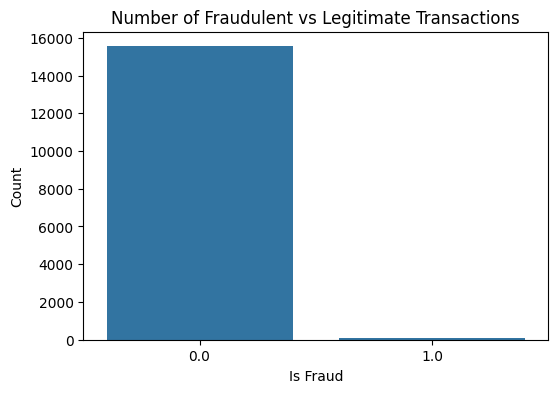

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data)
plt.title('Number of Fraudulent vs Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

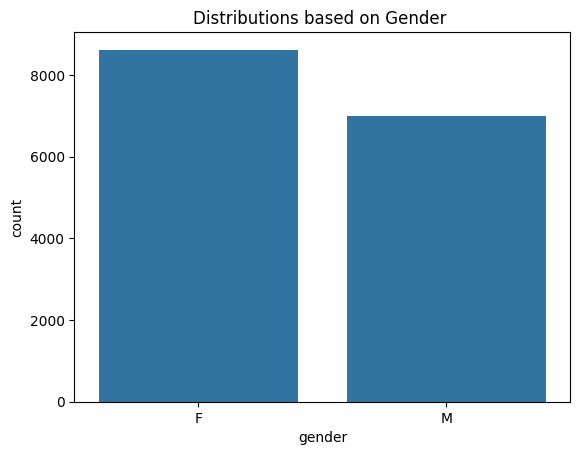

In [ ]:
sns.countplot(x='gender',data=data)
plt.title("Distributions based on Gender ")
plt.xticks
plt.show()

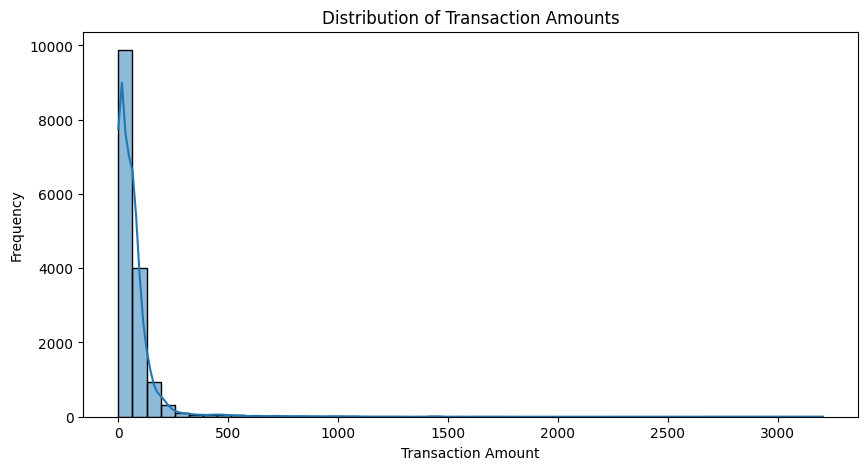

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


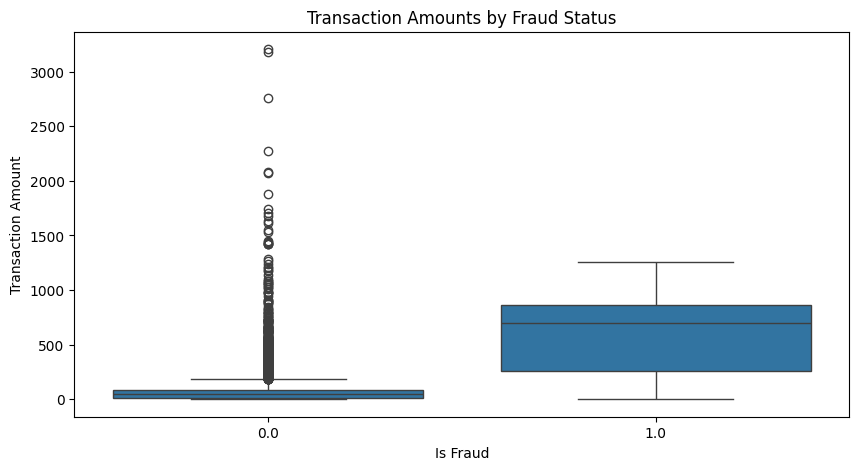

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_fraud', y='amt', data=data)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

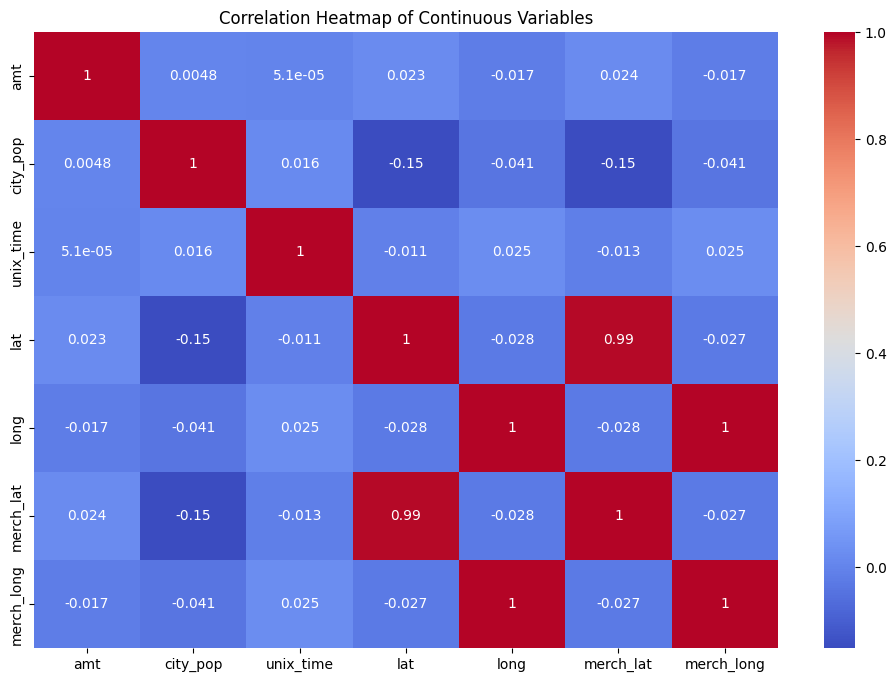

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[['amt', 'city_pop', 'unix_time', 'lat', 'long', 'merch_lat', 'merch_long']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

In [ ]:
data["merchant"].value_counts().sum()

15611

In [ ]:
data["gender"].unique()

array(['F', 'M'], dtype=object)

In [ ]:
data["is_fraud"].value_counts()

,count
is_fraud,
0.0,15544
1.0,67


In [ ]:
data["category"].value_counts()


,count
category,
gas_transport,1605
grocery_pos,1514
home,1461
shopping_pos,1380
kids_pets,1327
shopping_net,1187
food_dining,1123
personal_care,1121
entertainment,1070


In [ ]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
#dropping unwanted columns
data=data.drop(['Unnamed: 0','trans_date_trans_time','cc_num',"merchant","category","first","last","gender","street","city","state","job","dob","trans_num"],axis=1)

In [ ]:
#assinging x and y
x=data[['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat',
       'merch_long']]
y=data['is_fraud']

In [ ]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Logistic Regression

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_train=lr.predict(x_train)
y_test=lr.predict(x_test)
print("test_accuracy",accuracy_score(y_train,y_train))
print("test_accuracy",accuracy_score(y_test,y_test))
print("cross_validation",cross_val_score(lr,x_train,y_train,cv=5).mean())

test_accuracy 1.0
test_accuracy 1.0
cross_validation 1.0
